In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('C:/Users/alams/Desktop/Titanic/file/Train.csv')

In [3]:
df.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,...,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,Y,1674.09,20014.0
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,...,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,Y,13043.34,10173.0
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,...,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,Y,25375.27,16095.0
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,...,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,Y,3544.33,7707.0
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,...,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,Y,12780.44,96408.0


# EDA


In [4]:
Age = df[(df['age'] >= 100)|(df['age'] <= 18)].index
df.drop(Age, inplace=True)

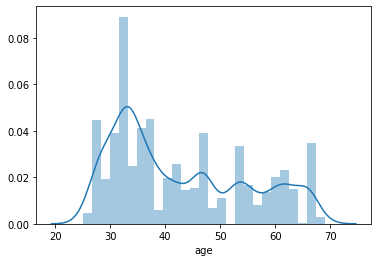

In [5]:
sns.distplot(df['age'])

Text(0.5, 1.0, 'Stacked bar-chart with counts')

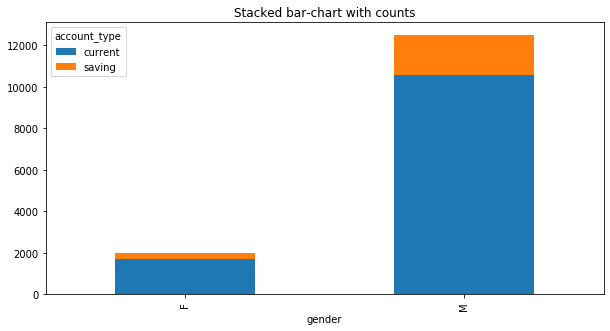

In [6]:
fig, (ax_1) = plt.subplots(1,1, figsize=(10,5))
# Stacked bar-chart representing counts
res = df.groupby(['gender', 'account_type']).size().unstack()
res.plot(kind='bar', stacked=True, ax=ax_1)
ax_1.set_title('Stacked bar-chart with counts')

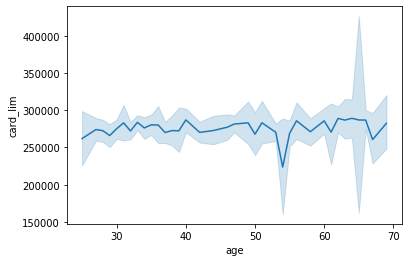

In [7]:
sns.lineplot(x="age", y="card_lim",data=df)
plt.savefig('craid_lim.png')

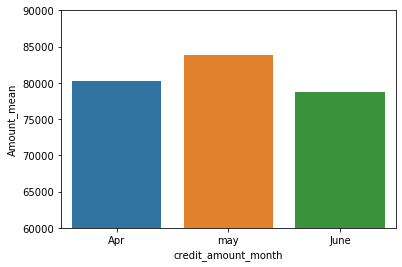

In [29]:
credit_amount_apr=df['credit_amount_apr'].mean()
credit_amount_jun=df['credit_amount_jun'].mean()
credit_amount_may=df['credit_amount_may'].mean()
credit_amount_df= pd.DataFrame({'credit_amount_month':['Apr','may','June'],'Amount_mean':[credit_amount_apr,credit_amount_may,credit_amount_jun]})
plt.ylim(60000, 90000)
sns.barplot(x='credit_amount_month',y='Amount_mean',data=credit_amount_df)
plt.savefig('credit_amount_month.png')

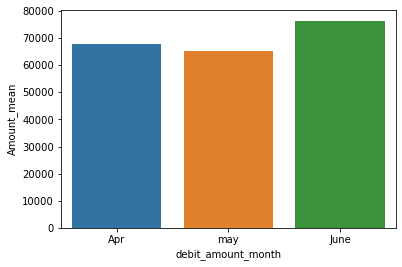

In [30]:
debit_amount_apr=df['debit_amount_apr'].mean()
debit_amount_jun=df['debit_amount_jun'].mean()
debit_amount_may=df['debit_amount_may'].mean()
debit_amount_df= pd.DataFrame({'debit_amount_month':['Apr','may','June'],'Amount_mean':[debit_amount_apr,debit_amount_may,debit_amount_jun]})
sns.barplot(x='debit_amount_month',y='Amount_mean',data=debit_amount_df)
plt.savefig('debit_amount_month.png')

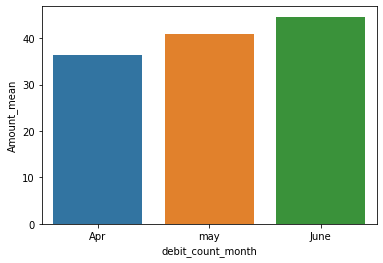

In [31]:
debit_count_apr=df['debit_count_apr'].mean()
debit_count_jun=df['debit_count_jun'].mean()
debit_count_may=df['debit_count_may'].mean()
debit_count_df= pd.DataFrame({'debit_count_month':['Apr','may','June'],'Amount_mean':[debit_count_apr,debit_count_may,debit_count_jun]})

sns.barplot(x='debit_count_month',y='Amount_mean',data=debit_count_df)
plt.savefig('debit_count_month.png')

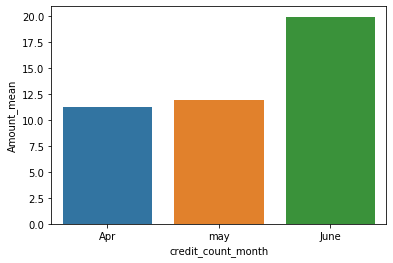

In [32]:
credit_count_apr=df['credit_count_apr'].mean()
credit_count_jun=df['credit_count_jun'].mean()
credit_count_may=df['credit_count_may'].mean()
credit_count_df= pd.DataFrame({'credit_count_month':['Apr','may','June'],'Amount_mean':[credit_count_apr,credit_count_may,credit_count_jun]})

sns.barplot(x='credit_count_month',y='Amount_mean',data=credit_count_df)
plt.savefig('credit_count_month.png')

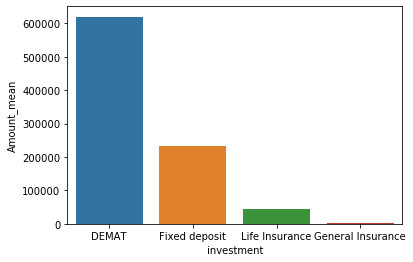

In [33]:
investment_1=df['investment_1'].mean()
investment_2=df['investment_2'].mean()
investment_3=df['investment_3'].mean()
investment_4=df['investment_4'].mean()
all_investment= pd.DataFrame({'investment':['DEMAT','Fixed deposit','Life Insurance','General Insurance'],'Amount_mean':[investment_1,investment_2,investment_3,investment_4]})

sns.barplot(x='investment',y='Amount_mean',data=all_investment)
plt.savefig('investment.png')

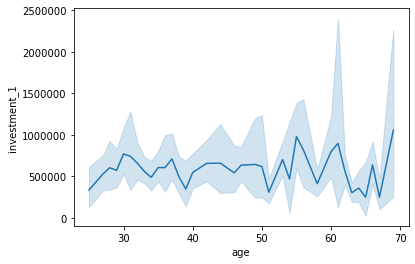

In [34]:
sns.lineplot(x="age", y="investment_1",data=df)


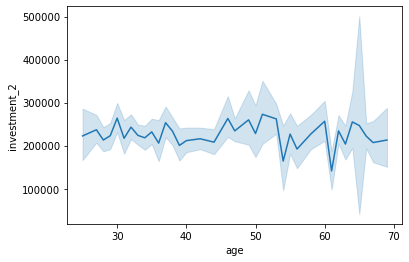

In [35]:
sns.lineplot(x="age", y="investment_2",data=df)


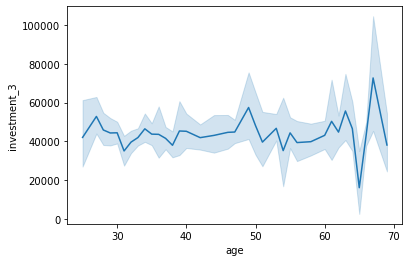

In [36]:
sns.lineplot(x="age", y="investment_3",data=df)

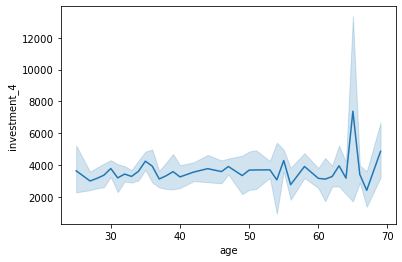

In [37]:
sns.lineplot(x="age", y="investment_4",data=df)

In [38]:
df_credit_count_months=df['credit_count_apr'].mean()+df['credit_count_jun'].mean()+df['credit_count_may'].mean()
df_debit_count_months=df['debit_count_apr'].mean()+df['debit_count_jun'].mean()+df['debit_count_may'].mean()


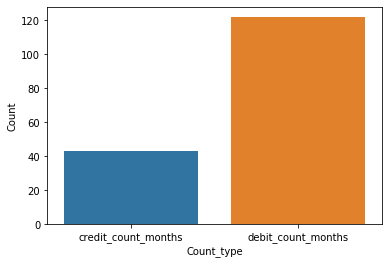

In [39]:
df_cd = pd.DataFrame({'Count_type':['credit_count_months','debit_count_months'],'Count':[df_credit_count_months,df_debit_count_months]})
df_cd
sns.barplot(x='Count_type',y='Count',data=df_cd)

In [40]:
df_credit_count_months=df['credit_count_apr']+df['credit_count_jun']+df['credit_count_may']
df_debit_count_months=df['debit_count_apr']+df['debit_count_jun']+df['debit_count_may']
df_credit_count_months.sum(),df_debit_count_months.sum()


(624334.0, 1763776.0)

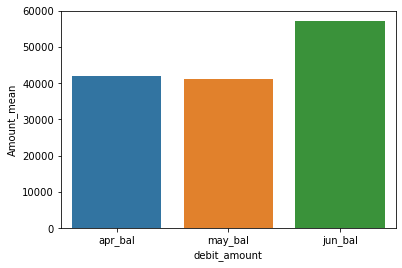

In [41]:
apr_bal=(df['debit_amount_apr']-(df['cc_cons_apr']+df['dc_cons_apr'])).mean()
may_bal=(df['debit_amount_may']-(df['cc_cons_may']+df['dc_cons_may'])).mean()
jun_bal=(df['debit_amount_jun']-(df['cc_cons_jun']+df['dc_cons_jun'])).mean()


all_debit_amount= pd.DataFrame({'debit_amount':['apr_bal','may_bal','jun_bal'],'Amount_mean':[apr_bal,may_bal,jun_bal]})

sns.barplot(x='debit_amount',y='Amount_mean',data=all_debit_amount)


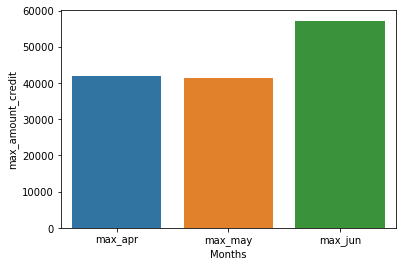

In [42]:


max_apr_bal=df['max_credit_amount_apr'].mean()
max_may_bal=df['max_credit_amount_may'].mean()
max_jun_bal=df['max_credit_amount_jun'].mean()


max_credit_amount_months= pd.DataFrame({'Months':['max_apr','max_may','max_jun'],'max_amount_credit':[apr_bal,may_bal,jun_bal]})

sns.barplot(x='Months',y='max_amount_credit',data=max_credit_amount_months)

In [43]:
df_credit_cons_max=df['cc_cons_apr'].mean()+df['cc_cons_may'].mean()+df['cc_cons_jun'].mean()
df_debit_cons_max=df['dc_cons_apr'].mean()+df['dc_cons_may'].mean()+df['dc_cons_jun'].mean()

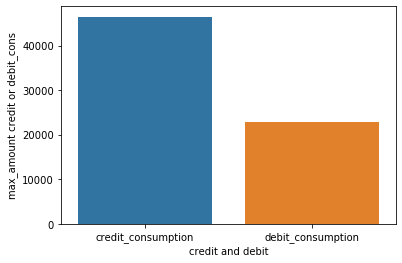

In [44]:
max_cons_months= pd.DataFrame({'credit and debit':['credit_consumption','debit_consumption'],'max_amount credit or debit_cons':[df_credit_cons_max,df_debit_cons_max]})

sns.barplot(x='credit and debit',y='max_amount credit or debit_cons',data=max_cons_months)

In [45]:
df_credit_cons_max=df['cc_cons_apr']+df['cc_cons_may']+df['cc_cons_jun']
df_debit_cons_max=df['dc_cons_apr']+df['dc_cons_may']+df['dc_cons_jun']

df_credit_cons_max.sum(),df_debit_cons_max.sum()

(671860624.635, 331430519.92)

In [46]:
investments=['investment_1','investment_2','investment_3','investment_4']
datasets=df.groupby('gender')[investments].mean()
print(datasets)
indx=np.arange(len(investments))
print(indx)

         investment_1   investment_2  investment_3  investment_4
gender                                                          
F       660525.429989  218848.911749  45171.227107   3447.846861
M       613328.265801  234408.242762  43897.679175   3531.237673
[0 1 2 3]


In [47]:
print(datasets.T)
male_means=list(datasets.T['M'])
female_means=list(datasets.T['F'])

gender                    F              M
investment_1  660525.429989  613328.265801
investment_2  218848.911749  234408.242762
investment_3   45171.227107   43897.679175
investment_4    3447.846861    3531.237673


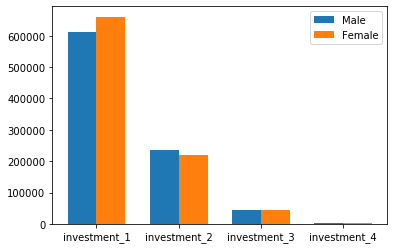

In [48]:
bar_width=0.35

fig,ax = plt.subplots()
barMale = ax.bar(indx-bar_width/2,male_means,bar_width,label='Male')
barFemale = ax.bar(indx+bar_width/2,female_means,bar_width,label='Female')

ax.set_xticks(indx)
ax.set_xticklabels(investments)

# ax.set_yticks(indx)
# ax.set_yticklabels(investments)

ax.legend()

plt.show()

# Baseline model

In [12]:
#df=df.drop(['ID','personal_loan_active','personal_loan_closed','vehicle_loan_active','vehicle_loan_closed','loan_enq'],axis=1)

In [42]:
df=pd.read_csv('C:\\Users\\ashup\\Downloads\\project\\data\\Train.csv')

In [43]:
df=df.drop(['ID','loan_enq'],axis=1)

In [44]:
df['account_type'] = pd.get_dummies(df['account_type'])

In [45]:
df['gender'] = pd.get_dummies(df['gender'])

In [46]:
from sklearn.model_selection import train_test_split
X=df.drop(['cc_cons'], axis=1)
y=df.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# code ends here


In [47]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score


In [48]:
LR = LinearRegression()

In [49]:
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
y_pred = LR.predict(X_test)

In [51]:
def rmsle(actual_column, predicted_column):
    sum=0.0
    for x,y in zip(actual_column,predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted_column))**0.5

In [52]:
rmsle=rmsle(y_test,y_pred)
msr=mean_squared_error(y_test,y_pred)

rmsle,msr

(4.23002646746819e-11, 1.359120954815408e-20)

In [53]:
r2_score(y_test, y_pred)

1.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 44 columns):
ID                       15000 non-null int64
account_type             15000 non-null object
gender                   15000 non-null object
age                      15000 non-null int64
region_code              15000 non-null int64
cc_cons_apr              15000 non-null float64
dc_cons_apr              15000 non-null float64
cc_cons_may              15000 non-null float64
dc_cons_may              15000 non-null float64
cc_cons_jun              15000 non-null float64
dc_cons_jun              15000 non-null float64
cc_count_apr             15000 non-null float64
cc_count_may             15000 non-null float64
cc_count_jun             15000 non-null float64
dc_count_apr             15000 non-null float64
dc_count_may             15000 non-null float64
dc_count_jun             15000 non-null float64
card_lim                 15000 non-null float64
personal_loan_active     15000 non-

In [14]:
df['Card_Trans_apr'] = np.mean(df['cc_cons_apr'])+ np.mean(df['dc_cons_apr'])
df['Card_Trans_may'] = df['cc_cons_may']+ df['dc_cons_may']
df['Card_Trans_jun'] = df['dc_cons_jun']+ df['dc_cons_jun']
df['debit_amount_apr'] = df['debit_amount_apr']

In [12]:
res = df.groupby('debit_amount_apr')['Card_Trans_apr'].mean().size().unstack()
res.plot(kind = 'bar', stacked = True)

TypeError: 'int' object is not callable